In [5]:
import qutip as q
import numpy as np
from qutip_qip.circuit import QubitCircuit
import qutip_qip.operations as qops
import qutip_qip.qubits as qubits

from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib import colormaps
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [6]:
N = 10
a, ad = q.destroy(N), q.create(N)
x, p = q.position(N), q.momentum(N)

s0 = q.basis(N, 0)
ad * s0

Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

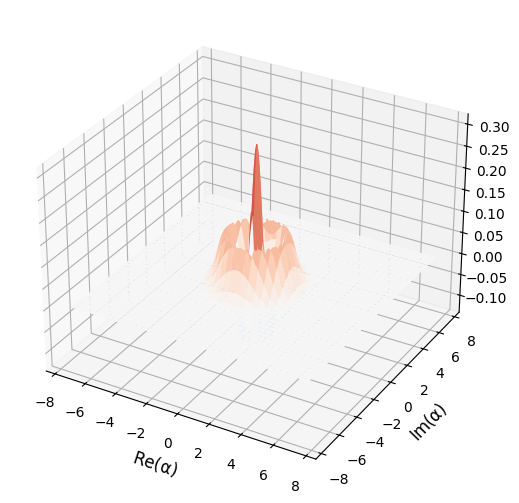

In [7]:
q.plot_wigner((q.basis(N, 2)).unit(), projection='3d', cmap=colormaps['RdBu_r']);

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$\\rm{Re}(\\alpha)$', ylabel='$\\rm{Im}(\\alpha)$'>)

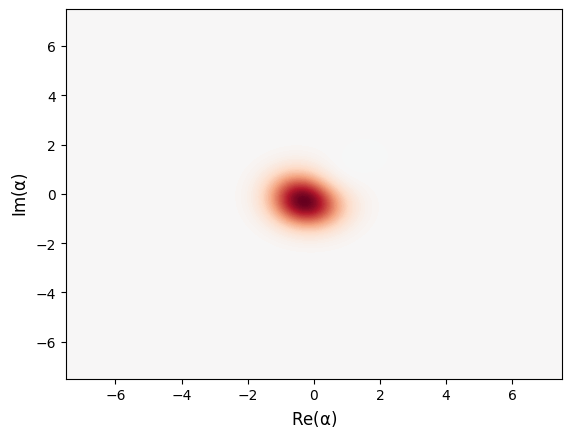

In [8]:




N = 2
# N = 50
s0 = q.basis(N)
sqz = q.squeeze(N, .8) * s0
D = q.displace(N, 2+2j)
q.plot_wigner(D * sqz, cmap=colormaps['RdBu_r'])

In [9]:

# Function to create the quantum state with various operations
def create_state(N, displacement, squeezing):
    # Start with the vacuum state |0>
    state = q.basis(N, 2)
    
    # Applying displacement operation
    if displacement != 0.0:
        state = q.displace(N, displacement) * state
    
    # Applying squeezing operation
    if squeezing != 0.0:
        state = q.squeeze(N, squeezing) * state
    return state

In [9]:


# Function to plot the Wigner function
def plot_wigner(state):
    xvec = np.linspace(-10, 10, 200)
    W = q.wigner(state, xvec, xvec)
    plt.figure(figsize=(8, 6))
    plt.contourf(xvec, xvec, W, 100, cmap='RdBu_r')
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('p')
    plt.title('Wigner Function')
    plt.show()

# Interactive function
def interactive_wigner(displacement, squeezing):
    N = 30 # Hilbert space dimension
    state = create_state(N, displacement, squeezing)
    plot_wigner(state)

interact(interactive_wigner, displacement = widgets.Play (min =-20 , max=20,step=1, value=0),
         #displacement=FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.0, description='Displacement'),
         squeezing=FloatSlider(min=0.0, max=2.0, step=0.1, value=0.0, description='Squeezing'))

         


interactive(children=(Play(value=0, description='displacement', max=20, min=-20), FloatSlider(value=0.0, descr…

<function __main__.interactive_wigner(displacement, squeezing)>

In [20]:

from matplotlib.animation import ArtistAnimation
from IPython.display import HTML

# Parameters
omega = 2  # Frequency
t = np.linspace(0, 2 * np.pi, 1000)  # Time array
phi_values = np.linspace(0, 2 * np.pi, 100)  # Values of phi to animate

ims = []

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_aspect(1)

for phi in phi_values:
    z = np.cos(omega * t + phi)
    im = ax.plot(t, z, color='blue')  # Plotting the cosine wave
    ims.append(im)  # Append the line plot to ims list

# Creating  the animation 
ani = ArtistAnimation(fig, ims, interval=100, blit=True)

plt.close(fig)  # Prevent the static image from showing
HTML(ani.to_jshtml()) 
